In [1]:
"""Show filtered and unfiltered backprojection of a sinogram."""

'Show filtered and unfiltered backprojection of a sinogram.'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from common.radon import add_noise_to_sinogram, radon, iradon

In [3]:
"""Read Shepp-Logan phantom and create sinogram."""

scanner_properties = {
    "views": 180,
    "angle": 180,
    "detector_count": 128,
    "detector_spacing": 1,
    "beam_geometry": "parallel",
}

f = np.load("../../data/shepp_logan.npy")
g = radon(img=f, **scanner_properties)

In [4]:
"""Perform unfiltered and filtered backprojection."""

f_bp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="BP",
    **scanner_properties,
)
f_fbp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="FBP",
    **scanner_properties,
)

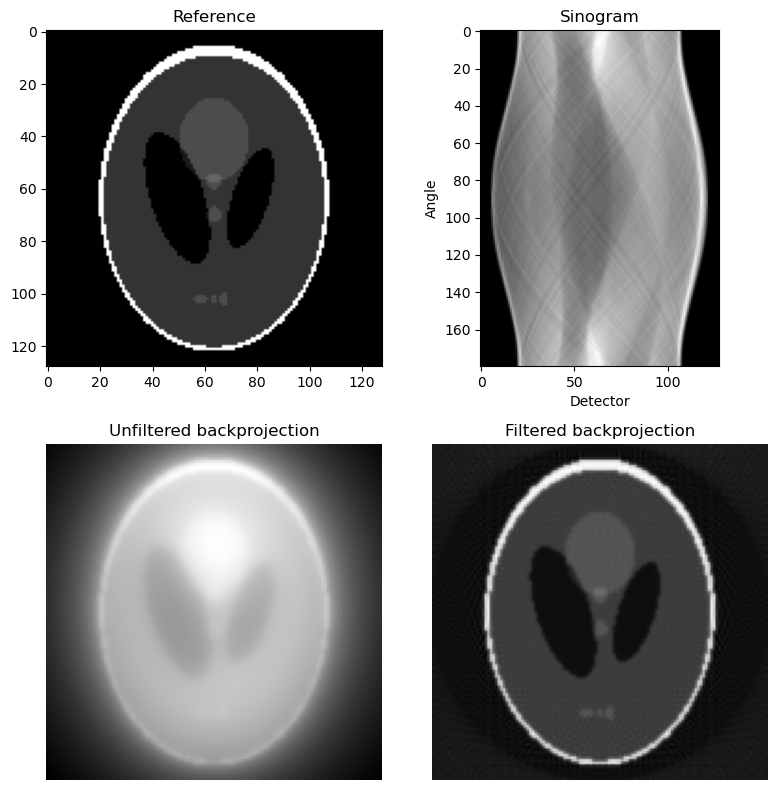

In [5]:
"""Display sinogram and backprojections."""

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(f, cmap="gray")
plt.title("Reference")
plt.subplot(2, 2, 2)
plt.imshow(g, cmap="gray")
plt.title("Sinogram")
plt.xlabel("Detector")
plt.ylabel("Angle")
plt.yticks(np.arange(0, 180, 20), np.arange(0, 180, 20))
plt.subplot(2, 2, 3)
plt.imshow(f_bp, cmap="gray")
plt.title("Unfiltered backprojection")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(f_fbp, cmap="gray")
plt.title("Filtered backprojection")
plt.axis("off")
plt.tight_layout()
plt.show()

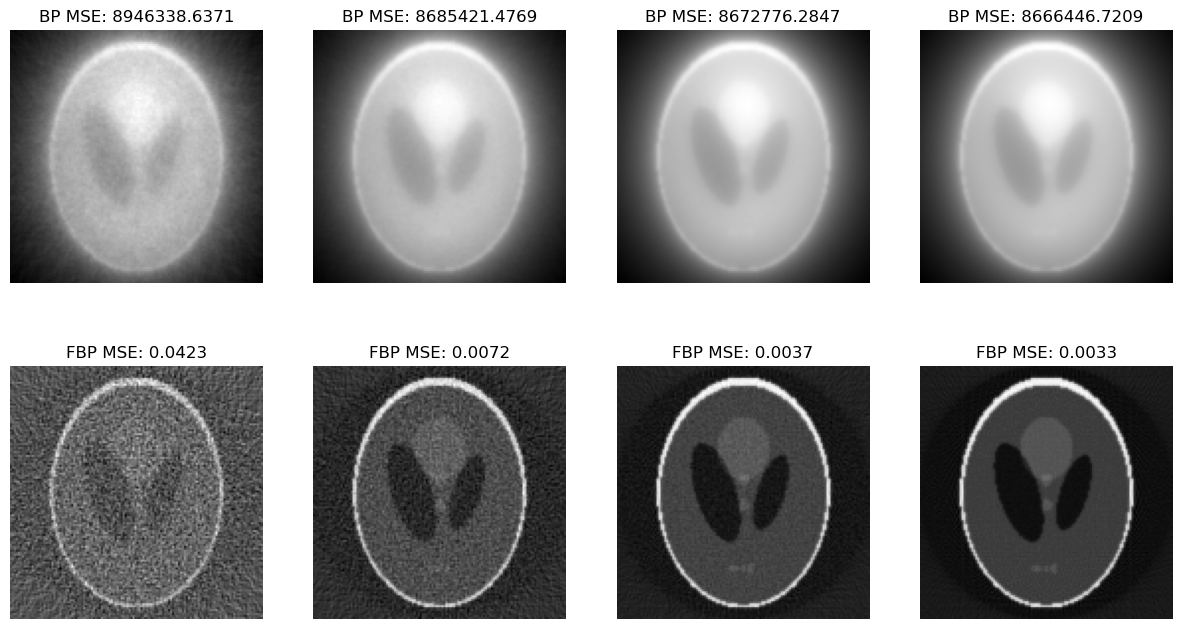

In [6]:
"""Display backprojections with different noise levels."""

fig, axs = plt.subplots(2, 4, figsize=(15, 8))

for idx, I_0 in enumerate([1e2, 1e3, 1e4, 1e5]):
    g_noise = add_noise_to_sinogram(sinogram=g, background_intensity=I_0)
    f_bp = iradon(
        sinogram=g_noise,
        img_dims=f.shape,
        recon_type="BP",
        **scanner_properties,
    )
    f_fbp = iradon(
        sinogram=g_noise,
        img_dims=f.shape,
        recon_type="FBP",
        **scanner_properties,
    )
    axs[0, idx].imshow(f_bp, cmap="gray")
    err_bp = np.mean(np.square(f_bp - f))
    axs[0, idx].set_title(f"BP MSE: {err_bp:.4f}")
    axs[0, idx].axis("off")
    axs[1, idx].imshow(f_fbp, cmap="gray")
    err_fbp = np.mean(np.square(f_fbp - f))
    axs[1, idx].set_title(f"FBP MSE: {err_fbp:.4f}")
    axs[1, idx].axis("off")

plt.show()

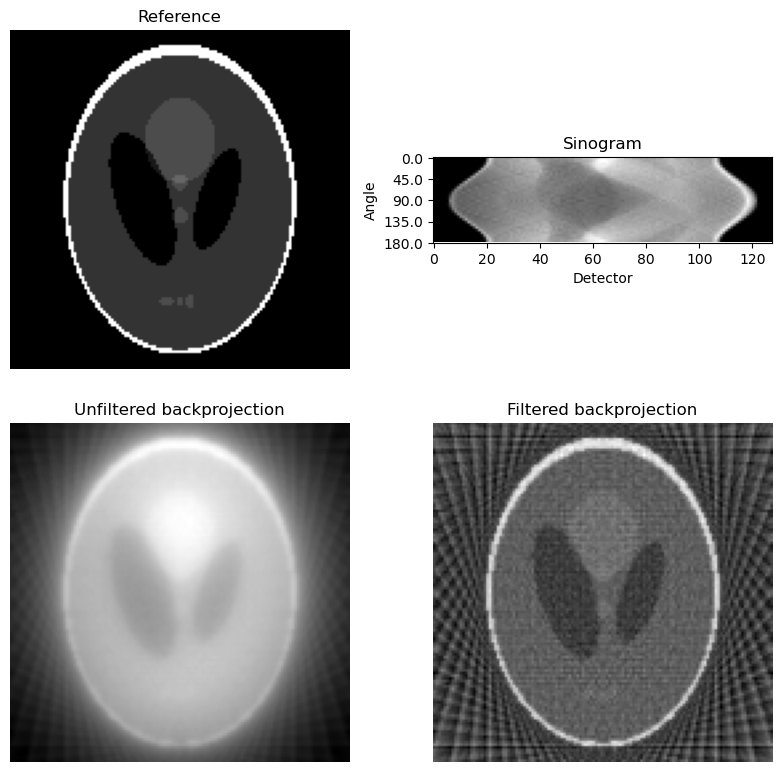

In [7]:
"""Show limited view reconstructions."""

scanner_properties = {
    "views": 32,
    "angle": 180,
    "detector_count": 128,
    "detector_spacing": 1,
    "beam_geometry": "parallel",
}

g = radon(img=f, **scanner_properties)

f_bp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="BP",
    **scanner_properties,
)
f_fbp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="FBP",
    **scanner_properties,
)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(f, cmap="gray")
plt.title("Reference")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(g, cmap="gray")
plt.title("Sinogram")
plt.xlabel("Detector")
plt.ylabel("Angle")
plt.yticks(np.linspace(0, 32, 5), np.linspace(0, 180, 5))
plt.subplot(2, 2, 3)
plt.imshow(f_bp, cmap="gray")
plt.title("Unfiltered backprojection")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(f_fbp, cmap="gray")
plt.title("Filtered backprojection")
plt.axis("off")
plt.tight_layout()
plt.show()

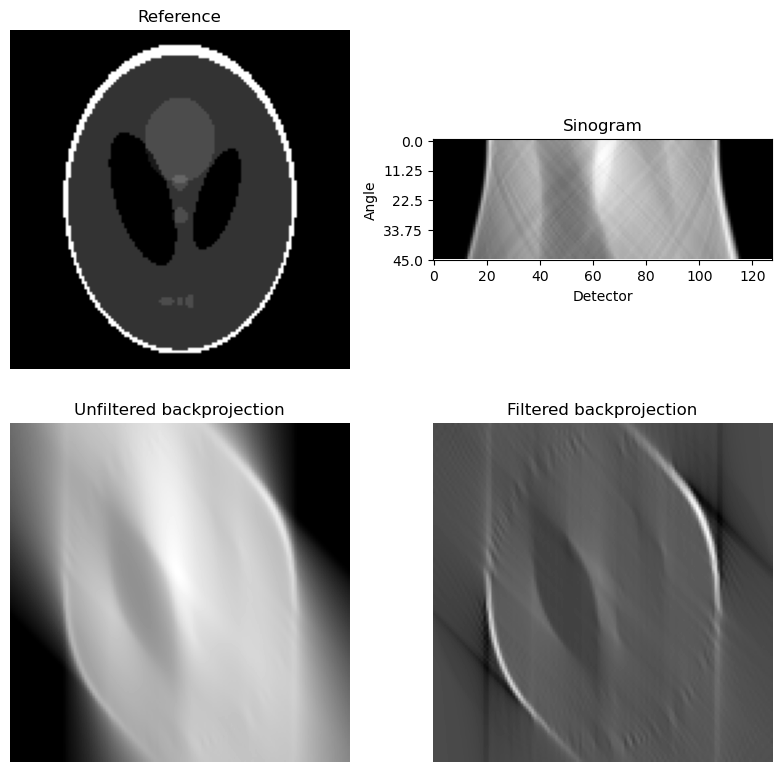

In [8]:
"""Show limited angle reconstructions."""

scanner_properties = {
    "views": 45,
    "angle": 45,
    "detector_count": 128,
    "detector_spacing": 1,
    "beam_geometry": "parallel",
}

g = radon(img=f, **scanner_properties)

f_bp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="BP",
    **scanner_properties,
)
f_fbp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="FBP",
    **scanner_properties,
)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(f, cmap="gray")
plt.title("Reference")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(g, cmap="gray")
plt.title("Sinogram")
plt.xlabel("Detector")
plt.ylabel("Angle")
plt.yticks(np.linspace(0, 45, 5), np.linspace(0, 45, 5))
plt.subplot(2, 2, 3)
plt.imshow(f_bp, cmap="gray")
plt.title("Unfiltered backprojection")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(f_fbp, cmap="gray")
plt.title("Filtered backprojection")
plt.axis("off")
plt.tight_layout()
plt.show()

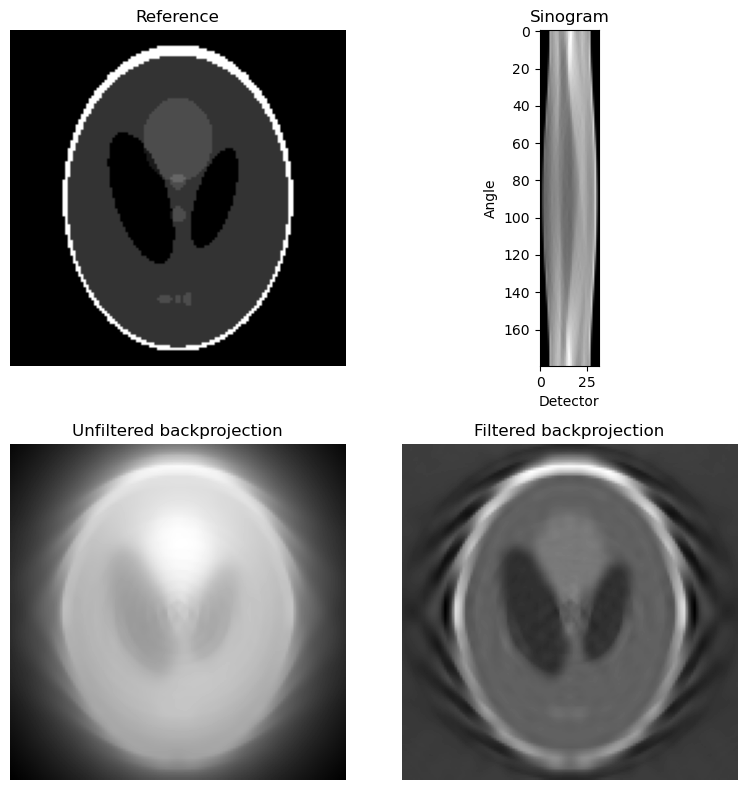

In [9]:
"""Show fewer detector elements."""

scanner_properties = {
    "views": 180,
    "angle": 180,
    "detector_count": 32,
    "detector_spacing": 4,
    "beam_geometry": "parallel",
}

g = radon(img=f, **scanner_properties)

f_bp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="BP",
    **scanner_properties,
)
f_fbp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="FBP",
    **scanner_properties,
)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(f, cmap="gray")
plt.title("Reference")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(g, cmap="gray")
plt.title("Sinogram")
plt.xlabel("Detector")
plt.ylabel("Angle")
plt.yticks(np.arange(0, 180, 20), np.arange(0, 180, 20))
plt.subplot(2, 2, 3)
plt.imshow(f_bp, cmap="gray")
plt.title("Unfiltered backprojection")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(f_fbp, cmap="gray")
plt.title("Filtered backprojection")
plt.axis("off")
plt.tight_layout()
plt.show()

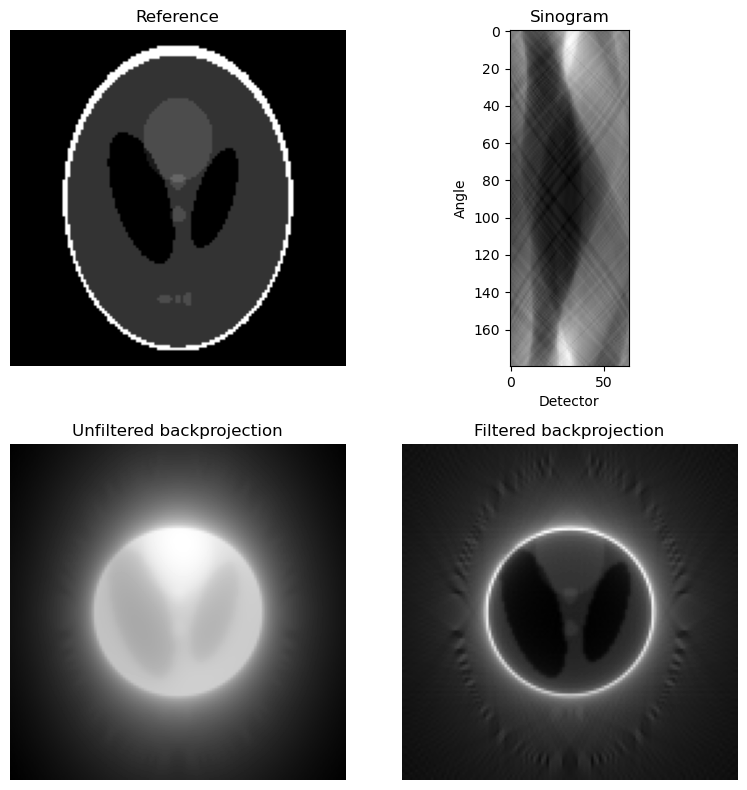

In [10]:
"""Show narrower detector."""

scanner_properties = {
    "views": 180,
    "angle": 180,
    "detector_count": 64,
    "detector_spacing": 1,
    "beam_geometry": "parallel",
}

g = radon(img=f, **scanner_properties)

f_bp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="BP",
    **scanner_properties,
)
f_fbp = iradon(
    sinogram=g,
    img_dims=f.shape,
    recon_type="FBP",
    **scanner_properties,
)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(f, cmap="gray")
plt.title("Reference")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(g, cmap="gray")
plt.title("Sinogram")
plt.xlabel("Detector")
plt.ylabel("Angle")
plt.yticks(np.arange(0, 180, 20), np.arange(0, 180, 20))
plt.subplot(2, 2, 3)
plt.imshow(f_bp, cmap="gray")
plt.title("Unfiltered backprojection")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(f_fbp, cmap="gray")
plt.title("Filtered backprojection")
plt.axis("off")
plt.tight_layout()
plt.show()